In [56]:
import importlib

import Game
import Agents
from Agents import GreedyAgents
importlib.reload(GreedyAgents)
importlib.reload(Agents)
importlib.reload(Game)
from Game import Game
from Agents import *

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
## Chapels per win
## Completion percentage for roads / cities
## Average finished city score
## Score accumulation for each bot - score growth curves


In [6]:
actionFrame = pd.DataFrame()
actionFrame

""


In [ ]:
for i in range(2000):
    carcassonne = Game(players=[RandomAgent(), RandomAgent()])
    actionCounts = []
    while carcassonne.gameOver() is False:
        actions = carcassonne.getActions()
        actionCounts.append(len(actions))

        player = carcassonne.currentPlayer()
        response = player.agent.getResponse(actions, carcassonne, player.id)
        carcassonne.applyAction(response)
        player.meepleCount += 1

    label = str(i)
    actionFrame.insert(i, label, actionCounts)


In [19]:
newActionCounts = actionFrame.copy()
#newActionCounts.set_index('0')

In [20]:
newActionCounts['average'] = newActionCounts.mean(axis=1)
newActionCounts = newActionCounts.join(pd.DataFrame({'turn':list(range(2,72))}))


In [21]:
turnAv = newActionCounts[['turn','average']]

<AxesSubplot:xlabel='turn'>

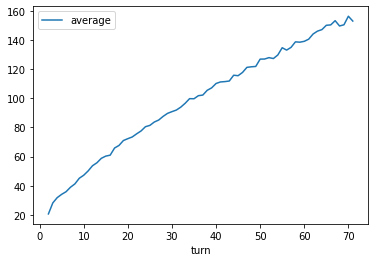

In [22]:
turnAv.plot.line(x='turn',y='average')

(0.0, 160.0)

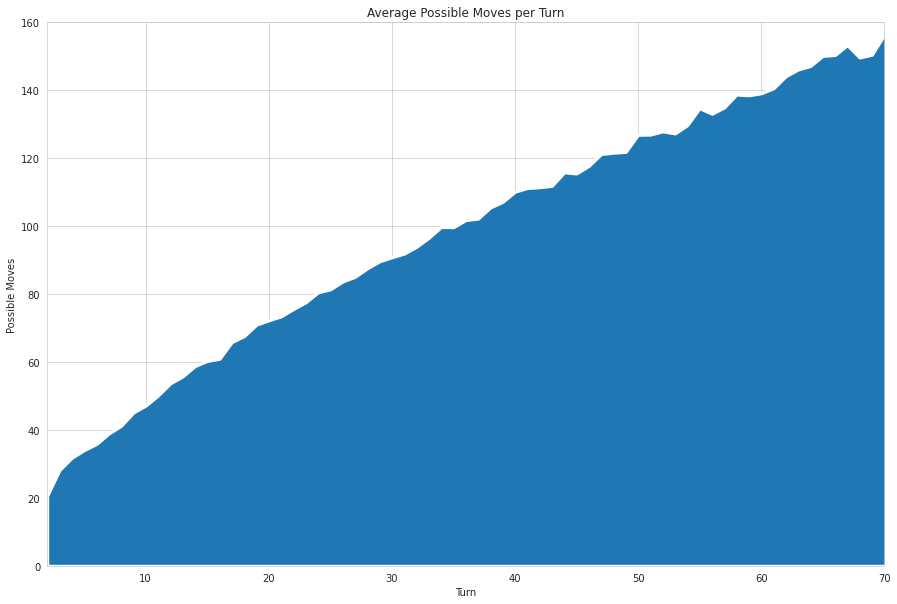

In [41]:
import seaborn as sns
sns.set_style('whitegrid')

fig = plt.figure(figsize=[15,10])
ax = plt.subplot(111)

l = ax.fill_between(turnAv['turn'],turnAv['average'])

l.set_linewidths([3])

ax.set_xlabel("Turn")
ax.set_ylabel("Possible Moves")
ax.set_title("Average Possible Moves per Turn")
ax.set_xlim(2,70)
ax.set_ylim(0,160)

#ax.set_xticks(np.arange(2,70,5))



In [111]:
ncalls = []
for i in range(25):

    carcassonne = Game(players=[RandomAgent(), GreedyDeterminized()])

    for i in range(41):
        carcassonne.applyAction(random.choice(carcassonne.getActions()))
        carcassonne.currentPlayer().meepleCount += 1

    greedy = carcassonne.currentPlayer().agent
    greedy.getResponse(carcassonne.getActions(), carcassonne, 1)
    print(greedy.calls)
    ncalls.append(greedy.calls)

Score! Blue player earned 4 points!
Current score: Red 0 - Blue 4
Meeple Counts: Red 10 - Blue 11
Score! Blue player earned 4 points!
Current score: Red 0 - Blue 8
Meeple Counts: Red 10 - Blue 12
Score! Red player earned 3 points!
Current score: Red 3 - Blue 8
Meeple Counts: Red 12 - Blue 13
49897
Score! Red player earned 2 points!
Current score: Red 2 - Blue 0
Meeple Counts: Red 11 - Blue 9
Score! Red player earned 4 points!
Current score: Red 6 - Blue 0
Meeple Counts: Red 12 - Blue 10
582011
991194
Score! Red player earned 4 points!
Current score: Red 4 - Blue 0
Meeple Counts: Red 9 - Blue 9
2720422
Score! Blue player earned 3 points!
Current score: Red 0 - Blue 3
Meeple Counts: Red 10 - Blue 14
Score! Red player earned 3 points!
Current score: Red 3 - Blue 3
Meeple Counts: Red 11 - Blue 14
3007597
Score! Blue player earned 8 points!
Current score: Red 0 - Blue 8
Meeple Counts: Red 16 - Blue 16
1873075
Score! Blue player earned 6 points!
Current score: Red 0 - Blue 6
Meeple Counts: R

KeyboardInterrupt: 

In [112]:
ncalls

[49897,
 582011,
 991194,
 2720422,
 3007597,
 1873075,
 3897820,
 960732,
 293933,
 2951025,
 396589,
 94928,
 474582,
 162618,
 123326,
 1369382,
 1102832,
 1585599,
 2159777,
 321338,
 1205793,
 1697078]

In [109]:

GreedyCalls2 = GreedyCalls.join(pd.DataFrame({'Eleven':ncalls}))


In [114]:
tst = np.array(GreedyCalls2['Eleven'])
tst.mean()

207603.56

In [115]:
np.array(ncalls).mean()

1273706.7272727273

In [102]:
GreedyCallsBackup #= GreedyCalls.copy()

,One,Eleven
0,1561,181646
1,29293,358361
2,13238,48089
3,17451,262125
4,4518,57546
5,22733,8572
6,29408,332541
7,62841,117171
8,10798,199883
9,24113,66931


In [110]:
GreedyCalls2

,One,Eleven
0,1561,290465
1,29293,260291
2,13238,1200374
3,17451,24352
4,4518,32004
5,22733,373528
6,29408,89437
7,62841,142801
8,10798,295723
9,24113,34510
